## Kaggle Titanic

## Data Dictionary
#### VariableDefinitionKey: 
- survival Survival 0 = No, 1 = Yes pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
- sex Sex Age Age in years sibsp # of siblings / spouses aboard the Titanic
- parch # of parents / children aboard the Titanic ticket Ticket number fare Passenger fare cabin Cabin number 
- embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes

- pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [91]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import seaborn as sns

In [92]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/train.csv')
dataset1 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/test.csv')
dataset2 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv')

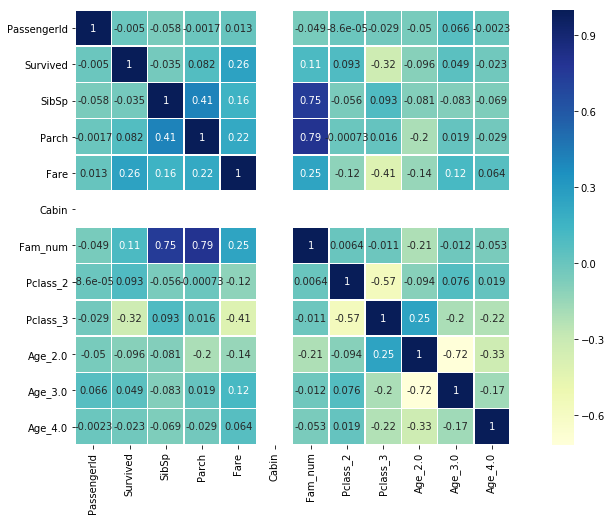

In [130]:
f, ax = plt.subplots(figsize = [15,8])
sns.heatmap(dataset.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

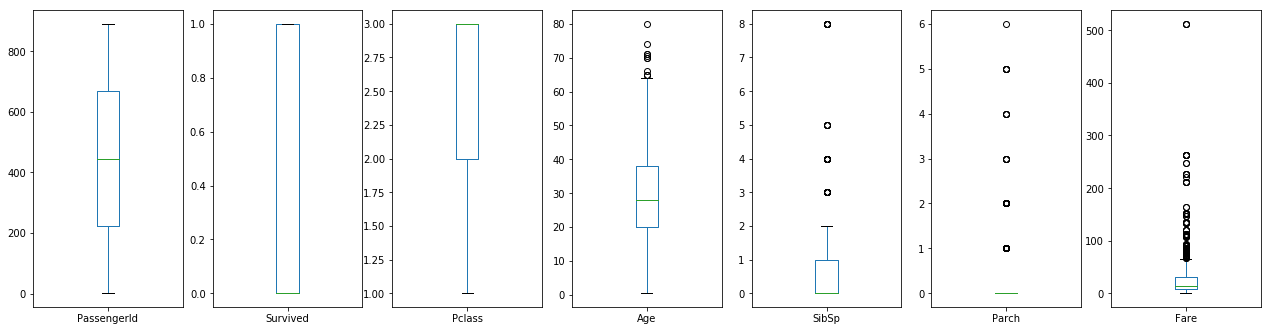

In [94]:
dataset.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False,figsize=[22,12])
plt.show()

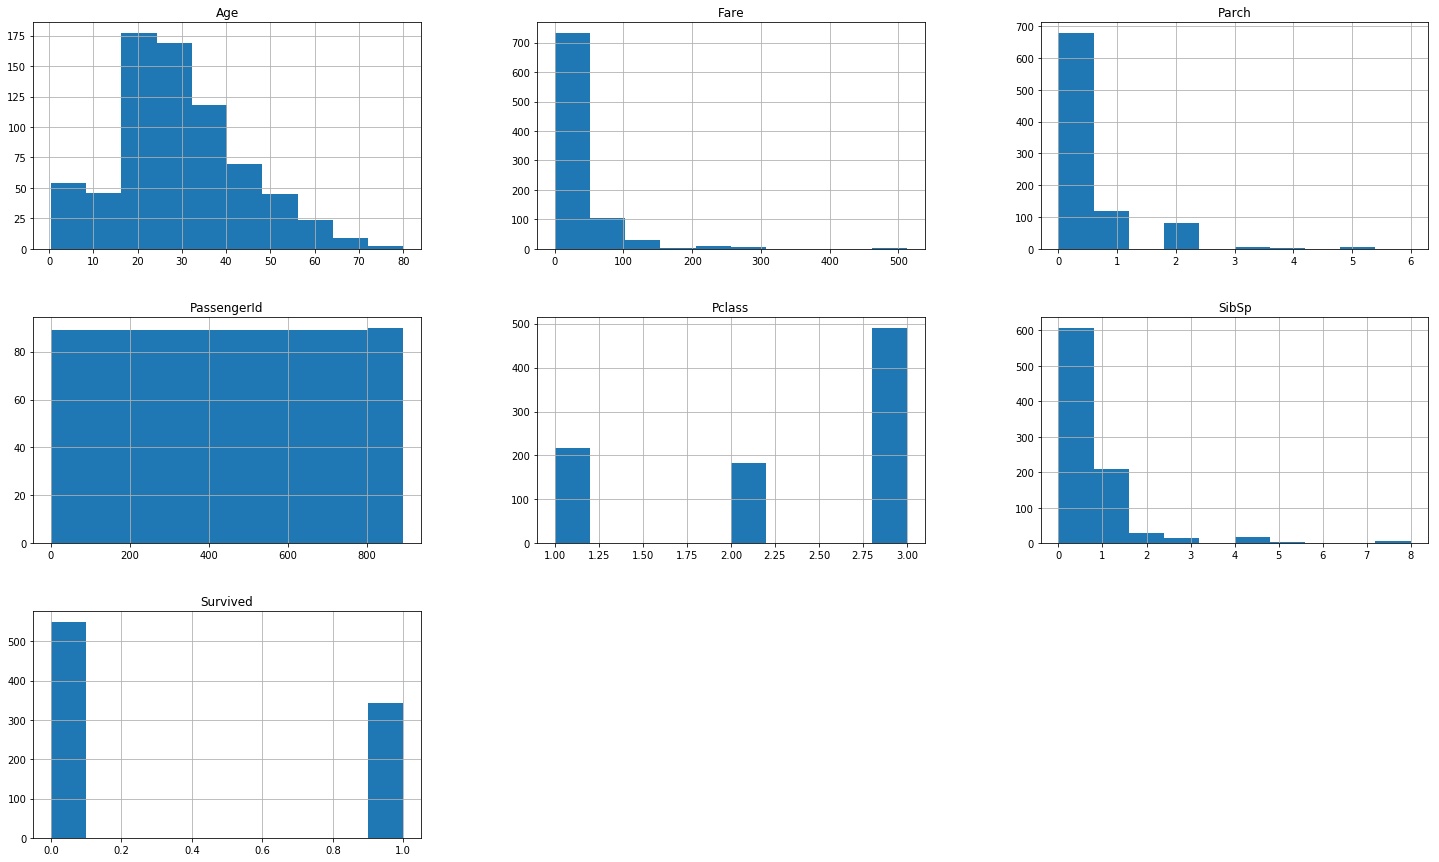

In [95]:
dataset.hist(figsize=[25,15])
plt.show()

C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

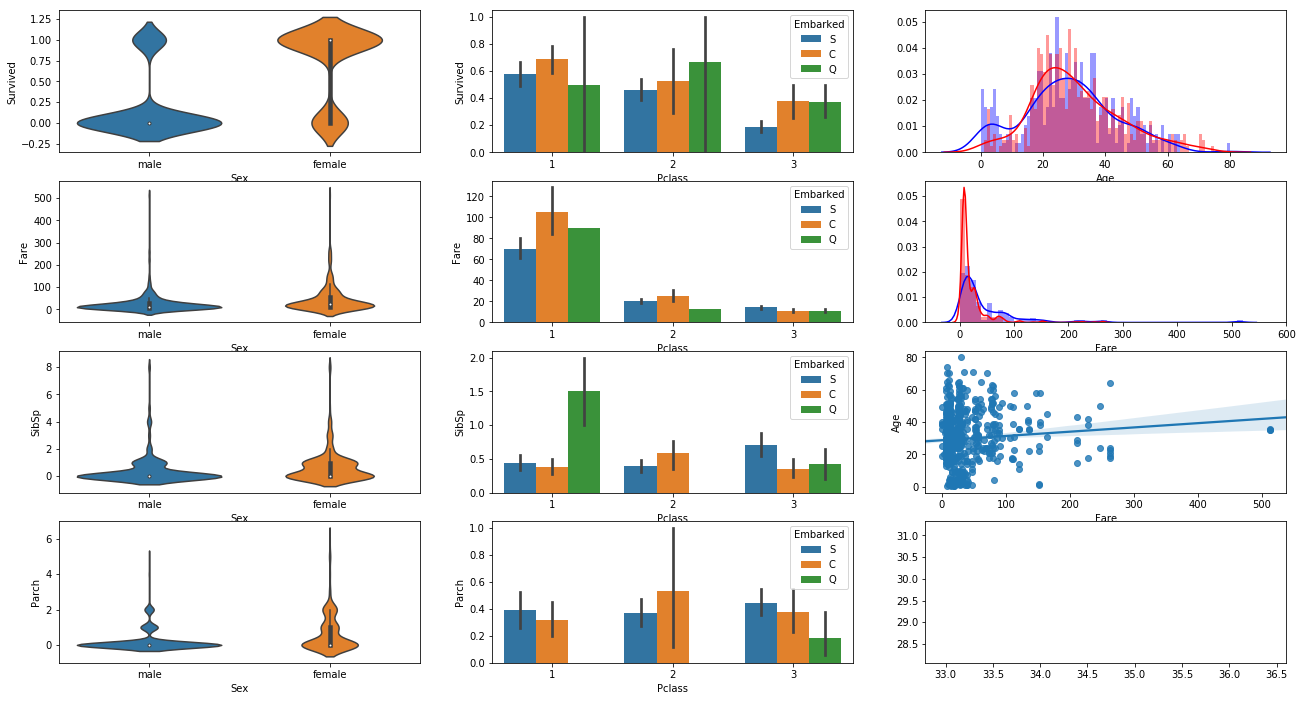

In [96]:
f, ax = plt.subplots(4, 3,figsize=[22,12])
sns.violinplot(x = 'Sex', y = 'Survived', data = dataset,ax = ax[0,0])
sns.barplot(x = 'Pclass',y ='Survived',data = dataset,hue = 'Embarked',ax = ax[0,1])
sns.distplot(dataset[dataset['Survived']==1]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',
            ax = ax[0,2])
sns.distplot(dataset[dataset['Survived']==0]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',
            ax = ax[0,2])
sns.violinplot(x = 'Sex', y = 'Fare', data = dataset,ax = ax[1,0])
sns.barplot(x ='Pclass', y = 'Fare',data = dataset , hue = 'Embarked', ax = ax[1,1])
sns.distplot(dataset[dataset['Survived']==1]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'blue',
            ax = ax[1,2])
sns.distplot(dataset[dataset['Survived']==0]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'red',
            ax = ax[1,2])
sns.violinplot(x = 'Sex', y ='SibSp',data = dataset,ax = ax[2,0])
sns.barplot(x= 'Pclass', y = 'SibSp', data = dataset, hue = 'Embarked', ax = ax[2,1])
sns.regplot(x = 'Fare', y = 'Age', data = dataset, ax = ax[2,2])
sns.violinplot(x = 'Sex', y = 'Parch', data = dataset, ax = ax[3,0])
sns.barplot(x = 'Pclass', y = 'Parch', data = dataset, hue = 'Embarked', ax = ax[3,1])
plt.close(12)
plt.close(13)
plt.close(14)

In [97]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
y_test = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv').values
y_train = dataset[['Survived']].values

In [99]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(dataset[['SibSp','Parch','Age']])
dataset[['SibSp','Parch','Age']] = imputer.transform(dataset[['SibSp','Parch','Age']])

imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(dataset1[['SibSp','Parch','Age']])
dataset1[['SibSp','Parch','Age']] = imputer.transform(dataset1[['SibSp','Parch','Age']])

In [100]:
'''DATA PREPERATION-MANIPULATION'''
dataset['Cabin'] = dataset['Cabin'].replace(regex={r'[^NaN]': 1})
dataset1['Cabin'] = dataset1['Cabin'].replace(regex={r'[^NaN]': 1})

dataset['Fam_num'] = dataset['SibSp'] + dataset['Parch']
dataset1['Fam_num'] = dataset1['SibSp'] + dataset1['Parch']

In [101]:
dataset['Fam_num'] = np.where(dataset['Fam_num'].between(2,3), 2, dataset['Fam_num'])
dataset['Fam_num'] = np.where(dataset['Fam_num'].between(4,20), 3, dataset['Fam_num'])

dataset1['Fam_num'] = np.where(dataset1['Fam_num'].between(2,3), 2, dataset1['Fam_num'])
dataset1['Fam_num'] = np.where(dataset1['Fam_num'].between(4,20), 3, dataset1['Fam_num'])

In [102]:
'''AGE IN CATEGORIES'''
dataset['Age'] = np.where(dataset['Age'].between(0,12), 1, dataset['Age'])
dataset['Age'] = np.where(dataset['Age'].between(13,30), 2, dataset['Age'])
dataset['Age'] = np.where(dataset['Age'].between(30,50), 3, dataset['Age'])
dataset['Age'] = np.where(dataset['Age'].between(50,100), 4, dataset['Age'])


dataset1['Age'] = np.where(dataset1['Age'].between(0,12), 1, dataset1['Age'])
dataset1['Age'] = np.where(dataset1['Age'].between(13,30), 2, dataset1['Age'])
dataset1['Age'] = np.where(dataset1['Age'].between(30,50), 3, dataset1['Age'])
dataset1['Age'] = np.where(dataset1['Age'].between(50,100), 4, dataset1['Age'])

In [103]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['Pclass'], prefix='Pclass', drop_first=True)], axis=1)
dataset1 = pd.concat([dataset1,pd.get_dummies(dataset1['Pclass'], prefix='Pclass', drop_first=True)], axis=1)
dataset.drop(['Pclass'],axis=1, inplace=True)
dataset1.drop(['Pclass'],axis=1, inplace=True)

dataset = pd.concat([dataset,pd.get_dummies(dataset['Age'], prefix='Age', drop_first=True)], axis=1)
dataset1 = pd.concat([dataset1,pd.get_dummies(dataset1['Age'], prefix='Age', drop_first=True)], axis=1)
dataset.drop(['Age'],axis=1, inplace=True)
dataset1.drop(['Age'],axis=1, inplace=True)

In [104]:
'''DATA PREPERATION-MANIPULATION'''
values = {'Sex': 1, 'Cabin': 0}
X_train = dataset.fillna(value=values)
X_test = dataset1.fillna(value=values)

In [105]:
X_train = X_train.replace(['female','male'],[0,1])
X_test = X_test.replace(['female','male'],[0,1])

In [106]:
X_train= X_train[['Sex', 'Cabin','Fam_num', 'Pclass_2', 'Pclass_3',
       'Age_2.0', 'Age_3.0', 'Age_4.0']]
X_test= X_test[['Sex', 'Cabin','Fam_num', 'Pclass_2', 'Pclass_3',
       'Age_2.0', 'Age_3.0', 'Age_4.0']]

In [107]:
#np.count_nonzero(np.isnan(X_train))
# performing standard scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [108]:
np.count_nonzero(np.isnan(X_train))

0

#### Classification 

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance 
from sklearn.linear_model import LinearRegression

In [110]:
clf_rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=200,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_xg = XGBClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC(C=1.0, cache_size=100, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [111]:
Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','XGBoost','LogisticRegression','SVM']
scores = []
models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_xg, clf_lr, clf_svm]
for model in models:
    score = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [112]:
#need to get rid of 7 + need to add one hot to the Cabin info
#importing model
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

#maiing object
regressor = LinearRegression()
#trainnig the model
mean_regression = []
for i in range(5):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size = 0.2, random_state = i)
    regressor.fit(X_train_split, y_train_split)
    y_pred_split = regressor.predict(X_test_split)
    y_pred_split = y_pred_split > 0.5
    mean_regression.append(accuracy_score(y_pred_split, y_test_split))

In [113]:
meanscore = np.array(mean_regression).mean()
Classifiers.append('Linear Regression')
scores.append(meanscore)

In [114]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)

In [115]:
mode

,score
SVM,0.832768
XGBoost,0.827162
ExtraTrees,0.818185
RandomForest,0.814814
DecisionTree,0.814814
Bagging,0.813678
AdaBoost,0.809209
Linear Regression,0.800000
LogisticRegression,0.795687


	score
XGBoost	0.831618
SVM	0.820458
Bagging	0.814915
DecisionTree	0.813791
AdaBoost	0.809171
RandomForest	0.807061
LogisticRegression	0.805813
ExtraTrees	0.800357
Linear Regression	0.781650

In [116]:
parameters_xg = {'max_depth':[3,6,7], 'learning_rate': [0.1,0.2], 'n_estimators': [300,200], 
                 'min_child_weight': [4], 'reg_alpha': [6,0], 'reg_lambda': [1,8],'max_delta_step':[2],
                 'gamma':[0],'seed':[1]}

parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

parameters_rf = {'n_estimators': [100,50], 'max_features': [7,'auto',None],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[1,7,], 
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini'], 'warm_start': [True,False]}

In [117]:
def grid(model,parameters,X_train,y_train):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, 
                        scoring = 'accuracy')
    grid.fit(X_train,np.ravel(y_train))
    return grid.best_score_, grid.best_estimator_.get_params()

In [118]:
def imp_features(model, model_name, params,X_train,y_train):
    Model = model(**params)
    Model.fit(X_train,y_train)
    names = ['Sex', 'Cabin','Fam_num', 'Pclass_2', 'Pclass_3',
       'Age_2.0', 'Age_3.0', 'Age_4.0']
    feature = Model.feature_importances_
    important_features = pd.Series(data = feature, index = names,)
    important_features = important_features.sort_values(ascending = True)
    return important_features.plot(kind = 'barh', grid = False,title = model_name)

In [119]:
%%capture
best_score_xg, best_params_xg = grid(clf_xg,parameters_xg,X_train,y_train)

In [120]:
print(best_score_xg)

0.8260381593714927


In [121]:
%%capture
best_score_svm, best_params_svm = grid(clf_svm, parameters_svm,X_train,y_train)

In [122]:
print(best_score_svm)

0.8316498316498316


In [133]:
best_params_svm

{'C': 0.9,
 'cache_size': 100,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [123]:
def boundaries(model, heading, best_params):
    Model = model(**best_params)
    Model.fit(X_train_reduced, y_train)

    X_set, y_set = np.concatenate([X_train_reduced, X_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                             np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    #plt.figure(figsize = [15,16])
    plt.contourf(X1, X2, Model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha = 0.5, cmap = ListedColormap(('k', 'blue')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
X_train_reduced = PCA(n_components = 2).fit_transform(X_train)
X_test_reduced  = PCA(n_components =  2).fit_transform(X_test)

Text(0.5,1,'Support Vector Machines')

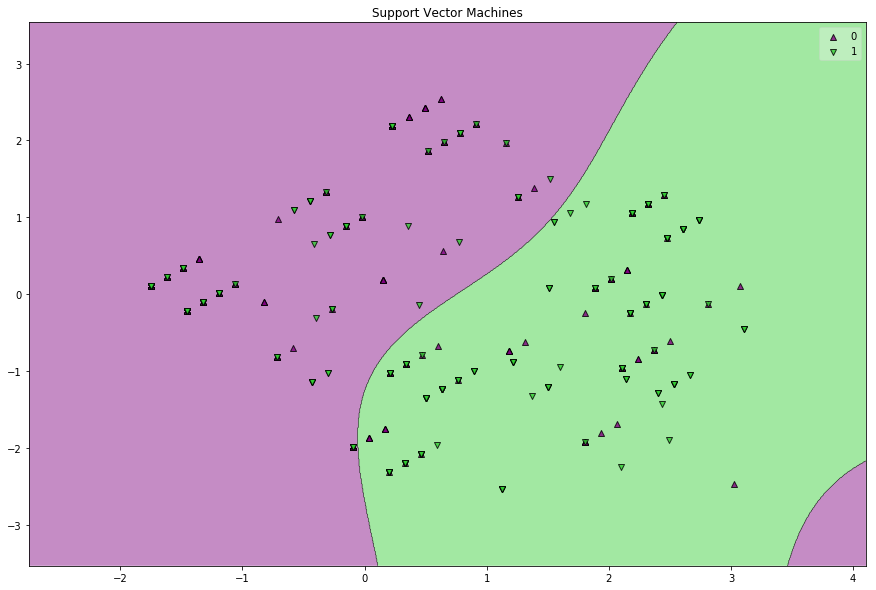

In [125]:
from mlxtend.plotting import plot_decision_regions
t = np.array(y_train)
t = np.ravel(t.astype(np.integer))
clf_svm = SVC(**best_params_svm)
clf_svm.fit(X_train_reduced,t)
plt.figure(figsize = [15,10])
plot_decision_regions(X_train_reduced, t, clf = clf_svm, hide_spines = False, colors = 'purple,limegreen',
                      markers = ['^','v'])
plt.title('Support Vector Machines')

In [126]:
clf_svm = SVC(**best_params_svm)
clf_svm.fit(X_train,y_train)
dataset2 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv')
y_test = dataset2.values
pred = clf_svm.predict(X_test)
predictions = pd.DataFrame(pred, columns = ['Survived'])
X = pd.concat([dataset2['PassengerId'],predictions['Survived']], axis=1)

C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
X.set_index('PassengerId').to_csv('predictions_svm_with_groups.csv')

In [129]:
accuracy_score(X['Survived'].values, y_test[:,1])

0.8947368421052632